In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import numpy as np
%matplotlib inline

parsed_file = "/home/michal/Documents/Misc/recommenders/vcs/book-recommender/data/ratings_Books.csv"

In [3]:
ratings_dataset = pd.read_csv(parsed_file)

In [4]:
print(ratings_dataset.describe(include="all"))

                  user        item           rating     timestamp
count         22507155    22507155  22507155.000000  2.250716e+07
unique         8026324     2330066              NaN           NaN
top     A14OJS0VWMOSWO  0439023483              NaN           NaN
freq             43201       21398              NaN           NaN
mean               NaN         NaN         4.295759  1.310415e+09
std                NaN         NaN         1.111507  1.106154e+08
min                NaN         NaN         1.000000  8.325504e+08
25%                NaN         NaN         4.000000  1.274573e+09
50%                NaN         NaN         5.000000  1.358813e+09
75%                NaN         NaN         5.000000  1.384560e+09
max                NaN         NaN         5.000000  1.406074e+09


In [5]:
print(ratings_dataset.head(10))

             user        item  rating   timestamp
0   AH2L9G3DQHHAJ  0000000116       4  1019865600
1  A2IIIDRK3PRRZY  0000000116       1  1395619200
2  A1TADCM7YWPQ8M  0000000868       4  1031702400
3   AWGH7V0BDOJKB  0000013714       4  1383177600
4  A3UTQPQPM4TQO0  0000013714       5  1374883200
5   A8ZS0I5L5V31B  0000013714       5  1393632000
6   ACNGUPJ3A3TM9  0000013714       4  1386028800
7  A3BED5QFJWK88M  0000013714       4  1350345600
8  A2SUAM1J3GNN3B  0000013714       5  1252800000
9   APOZ15IEYQRRR  0000013714       5  1362787200


In [6]:
rating_distribution = dict()
rating_distribution[0] = 0

s = 0
for r in range(1, 6):
    rating_distribution[r] = ratings_dataset.loc[ratings_dataset["rating"] == r].count()["item"]
    s += rating_distribution[r]
    
rating_distribution = {float(k)/s*100: v for k, v in rating_distribution.iteritems()}
print(rating_distribution)

{0.0: 0, 4.443031560408234e-06: 1116862, 1.3329094681224704e-05: 1922390, 1.7772126241632936e-05: 4602555, 2.2215157802041175e-05: 13886788, 8.886063120816468e-06: 978560}


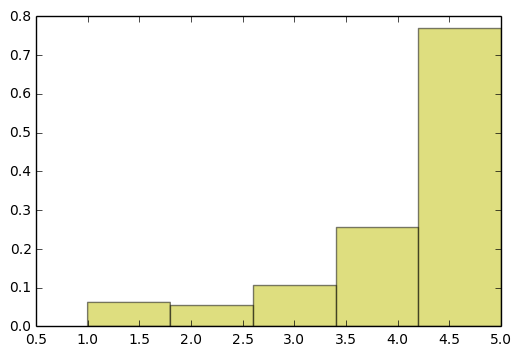

{0.0: 0, 4.443031560408234e-06: 1116862, 1.3329094681224704e-05: 1922390, 1.7772126241632936e-05: 4602555, 2.2215157802041175e-05: 13886788, 8.886063120816468e-06: 978560}


In [7]:
# df.hist(ratings_dataset, column="rating")
# n, bins, patches = plt.hist(rating_distribution.values(), normed=True)
plt.hist(ratings_dataset["rating"], bins=5, normed=1, facecolor='y', alpha=0.5)
plt.show()
print(rating_distribution)

In [18]:
# priemerne hodnotenie pre uzivatela
users = ratings_dataset["user"].unique()
print users
print users.__len__()

['AH2L9G3DQHHAJ' 'A2IIIDRK3PRRZY' 'A1TADCM7YWPQ8M' ..., 'AQSL89CSKJYB1'
 'A1CI87FHKK6HVC' 'A8W4BR3HGGS3C']
8026324


In [17]:
avg_for_user = list()

for user in np.random.choice(users, 1000):
    user_sum = ratings_dataset[ratings_dataset['user'] == user]["rating"].sum()
    user_len = ratings_dataset[ratings_dataset['user'] == user]["rating"].__len__()
    user_avg = float(user_sum)/user_len
    avg_for_user.append(user_avg)
    
print(avg_for_user[:20])

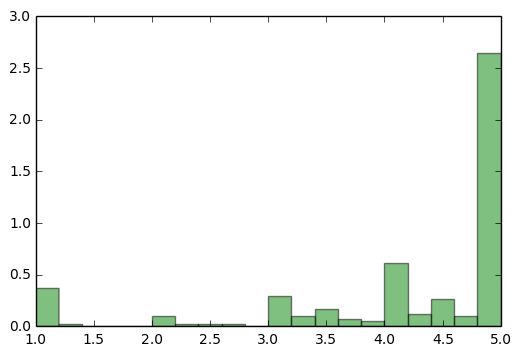

In [30]:
plt.hist(avg_for_user, bins=20, normed=1, facecolor='g', alpha=0.5)
plt.show()

In [52]:
# priemerne hodnotenie polozky
books = ratings_dataset["item"].unique()
print books
print books.__len__()

['0000000116' '0000000868' '0000013714' ..., 'B00M111QCM' 'B00M1336U0'
 'B00M13FNSS']
2330066


In [56]:
avg_for_book = list()

for book in np.random.choice(books, 1000):
    book_sum = ratings_dataset[ratings_dataset['item'] == book]["rating"].sum()
    book_len = ratings_dataset[ratings_dataset['item'] == book]["rating"].__len__()
    book_avg = float(book_sum)/book_len
    avg_for_book.append(book_avg)
    
print(avg_for_book[:20])

[4.333333333333333, 5.0, 5.0, 5.0, 5.0, 5.0, 3.8823529411764706, 1.0, 5.0, 3.6, 4.0, 5.0, 4.333333333333333, 4.615384615384615, 3.6363636363636362, 5.0, 4.166666666666667, 5.0, 5.0, 5.0]


[4.333333333333333, 5.0, 5.0, 5.0, 5.0, 5.0, 3.8823529411764706, 1.0, 5.0, 3.6, 4.0, 5.0, 4.333333333333333, 4.615384615384615, 3.6363636363636362, 5.0, 4.166666666666667, 5.0, 5.0, 5.0]


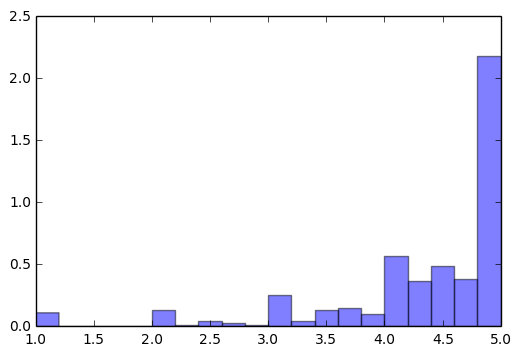

In [57]:
print(avg_for_book[:20])
plt.hist(avg_for_book, bins=20, normed=1, facecolor='b', alpha=0.5)
plt.show()